In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Walmart_Sales.csv")

In [5]:
df.shape

(6435, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [9]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


(array([170., 362., 292., 383., 490., 343., 256., 231., 220., 317., 361.,
        239., 211., 229., 230., 270., 275., 192., 175., 137., 106., 107.,
        143., 179., 133., 131.,  83.,  58.,  30.,  12.,  11.,  10.,   5.,
          8.,   4.,  10.,   4.,   4.,   1.,   1.,   0.,   1.,   0.,   1.,
          1.,   2.,   3.,   0.,   1.,   3.]),
 array([ 209986.25 ,  282160.254,  354334.258,  426508.262,  498682.266,
         570856.27 ,  643030.274,  715204.278,  787378.282,  859552.286,
         931726.29 , 1003900.294, 1076074.298, 1148248.302, 1220422.306,
        1292596.31 , 1364770.314, 1436944.318, 1509118.322, 1581292.326,
        1653466.33 , 1725640.334, 1797814.338, 1869988.342, 1942162.346,
        2014336.35 , 2086510.354, 2158684.358, 2230858.362, 2303032.366,
        2375206.37 , 2447380.374, 2519554.378, 2591728.382, 2663902.386,
        2736076.39 , 2808250.394, 2880424.398, 2952598.402, 3024772.406,
        3096946.41 , 3169120.414, 3241294.418, 3313468.422, 3385642.426,
 

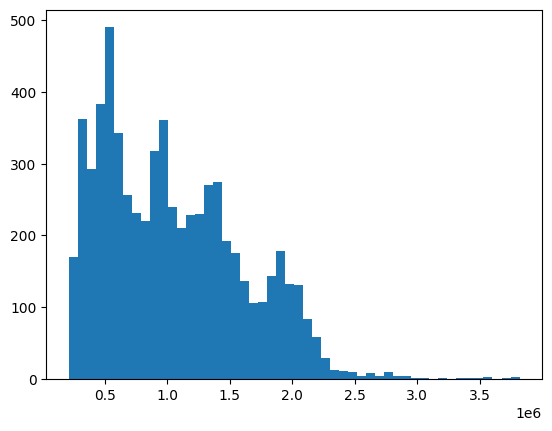

In [12]:
plt.hist(df['Weekly_Sales'], bins=50)

In [ ]:
df['Weekly_Sales_log'] = np.log(df['Weekly_Sales'] + 1)  # +1 to avoid log(0)
df.drop(columns=['Weekly_Sales'], inplace = True)

(array([  5.,  15.,  38.,  33.,  67., 103.,  98.,  78.,  92.,  82.,  76.,
        103., 150., 133., 149., 240., 203., 168., 155., 159., 123., 139.,
        143., 140., 204., 251., 292., 193., 202., 196., 231., 261., 314.,
        236., 203., 166., 152., 234., 229., 189.,  97.,  27.,  17.,  15.,
         15.,   6.,   1.,   2.,   6.,   4.]),
 array([12.25480209, 12.3128144 , 12.3708267 , 12.42883901, 12.48685131,
        12.54486362, 12.60287592, 12.66088823, 12.71890053, 12.77691283,
        12.83492514, 12.89293744, 12.95094975, 13.00896205, 13.06697436,
        13.12498666, 13.18299897, 13.24101127, 13.29902358, 13.35703588,
        13.41504818, 13.47306049, 13.53107279, 13.5890851 , 13.6470974 ,
        13.70510971, 13.76312201, 13.82113432, 13.87914662, 13.93715893,
        13.99517123, 14.05318354, 14.11119584, 14.16920814, 14.22722045,
        14.28523275, 14.34324506, 14.40125736, 14.45926967, 14.51728197,
        14.57529428, 14.63330658, 14.69131889, 14.74933119, 14.80734349,
 

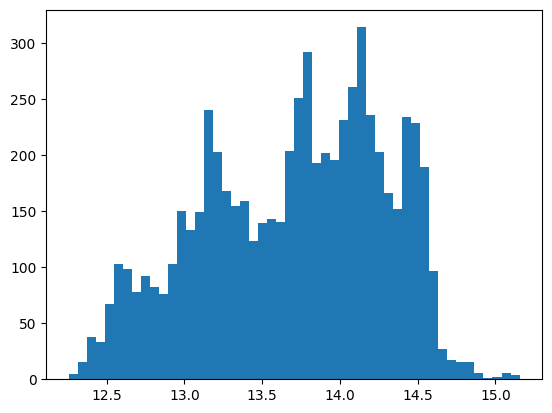

In [19]:
plt.hist(df['Weekly_Sales_log'], bins=50)

In [26]:
# Prepare data for regression and classification tasks
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Drop any rows with missing values for simplicity
reg_df = df.dropna()

# Regression target: Weekly_Sales_log
reg_target = 'Weekly_Sales_log'
reg_features = [col for col in reg_df.columns if col != reg_target]
X_reg = reg_df[reg_features]
y_reg = reg_df[reg_target]

# Encode categorical features for regression
for col in X_reg.select_dtypes(include=['object']).columns:
    X_reg[col] = LabelEncoder().fit_transform(X_reg[col])

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Classification target: Create a binary target (e.g., above/below median sales)
median_sales = reg_df[reg_target].median()
reg_df['High_Sales'] = (reg_df[reg_target] > median_sales).astype(int)
class_target = 'High_Sales'
class_features = [col for col in reg_df.columns if col not in [reg_target, class_target]]
X_class = reg_df[class_features]
y_class = reg_df[class_target]

for col in X_class.select_dtypes(include=['object']).columns:
    X_class[col] = LabelEncoder().fit_transform(X_class[col])

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

C:\Users\ROG\AppData\Local\Temp\ipykernel_29096\1878226884.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_reg[col] = LabelEncoder().fit_transform(X_reg[col])
C:\Users\ROG\AppData\Local\Temp\ipykernel_29096\1878226884.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_class[col] = LabelEncoder().fit_transform(X_class[col])


In [27]:
# Train regression models and compare R2 scores
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score

regressors = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regressor': SVR()
}

reg_results = {}
for name, model in regressors.items():
    model.fit(X_train_reg, y_train_reg)
    y_pred = model.predict(X_test_reg)
    reg_results[name] = r2_score(y_test_reg, y_pred)

reg_results

{'Linear Regression': 0.7199231669227435,
 'Decision Tree': 0.9600144729455875,
 'Random Forest': 0.9784272950059365,
 'Gradient Boosting': 0.9450187576455319,
 'Support Vector Regressor': 0.3247550588463267}

In [28]:
# Train classification models and compare R2 scores
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'Support Vector Classifier': SVC()
}

class_results = {}
for name, model in classifiers.items():
    model.fit(X_train_class, y_train_class)
    y_pred = model.predict(X_test_class)
    # For classification, use R2 score for comparison as requested
    class_results[name] = r2_score(y_test_class, y_pred)

class_results

{'Logistic Regression': 1.0,
 'Decision Tree Classifier': 1.0,
 'Random Forest Classifier': 1.0,
 'Gradient Boosting Classifier': 1.0,
 'Support Vector Classifier': -0.28677621283255106}

In [29]:
# Display comparison of R2 scores for all models
import pandas as pd

results_df = pd.DataFrame({
    'Regression Models': reg_results,
    'Classification Models': class_results
})
results_df

,Regression Models,Classification Models
Linear Regression,0.719923,NaN
Decision Tree,0.960014,NaN
Random Forest,0.978427,NaN
Gradient Boosting,0.945019,NaN
Support Vector Regressor,0.324755,NaN
Logistic Regression,NaN,1.000000
Decision Tree Classifier,NaN,1.000000
Random Forest Classifier,NaN,1.000000
Gradient Boosting Classifier,NaN,1.000000
Support Vector Classifier,NaN,-0.286776


In [32]:
# Save both models in a single file
from joblib import dump
models = {'regressor': rf_reg, 'classifier': gb_clf}
dump(models, 'model.pkl')

['model.pkl']